In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

#Path and Dropping NaN values
path = r'C:\Users\layoc\OneDrive\Documents\VSCodeLearn\Life Expectancy Data.csv'
data = pd.read_csv(path)
cleanData = data.dropna()

#Variables for Multiple Linear Regression
X = cleanData[['Adult Mortality','infant deaths','Alcohol','percentage expenditure','Hepatitis B','Measles','BMI','under-five deaths','Polio','Total expenditure',
               'Diphtheria','HIV/AIDS','GDP','Population','thinness  1-19 years','thinness 5-9 years','Income composition of resources','Schooling']]
y = cleanData[['Life expectancy']]

#train_test_split method for training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)


In [2]:
from sklearn.linear_model import LinearRegression

#creating Linear Regression Model and fitting our Training Data
model = LinearRegression()
model.fit(X_train,y_train)

coef = model.coef_
intercept = model.intercept_

#Predict method to predict life expectancy age
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f"The Coefficient for the X values are: {coef}")
print(f"The Intercept is: {intercept}")

The Coefficient for the X values are: [[-1.67418670e-02  9.70628342e-02 -7.92112868e-02  4.32336088e-04
  -7.63189022e-03 -7.80576842e-06  2.65638653e-02 -7.32576205e-02
   9.37308516e-03  9.51991302e-02  1.40331191e-02 -4.32653377e-01
  -1.43514959e-07  6.10426563e-10 -4.22876707e-02 -4.84407643e-02
   8.89881085e+00  9.67414501e-01]]
The Intercept is: [53.22794644]


In [3]:
from sklearn.metrics import mean_squared_error, r2_score

#Finding MSE and R^2 on Training Data and Testing Data
mse_train = mean_squared_error(y_train,y_train_pred)
r2_train = r2_score(y_train,y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Mean Squared Error for train: {mse_train}")
print(f"R Squared for train: {r2_train}")

print(f"\nMean Squared Error for test: {mse_test}")
print(f"R Squared for test: {r2_test}")

Mean Squared Error for train: 12.661944069435675
R Squared for train: 0.8393107461074596

Mean Squared Error for test: 13.538037330586517
R Squared for test: 0.8093837827628405


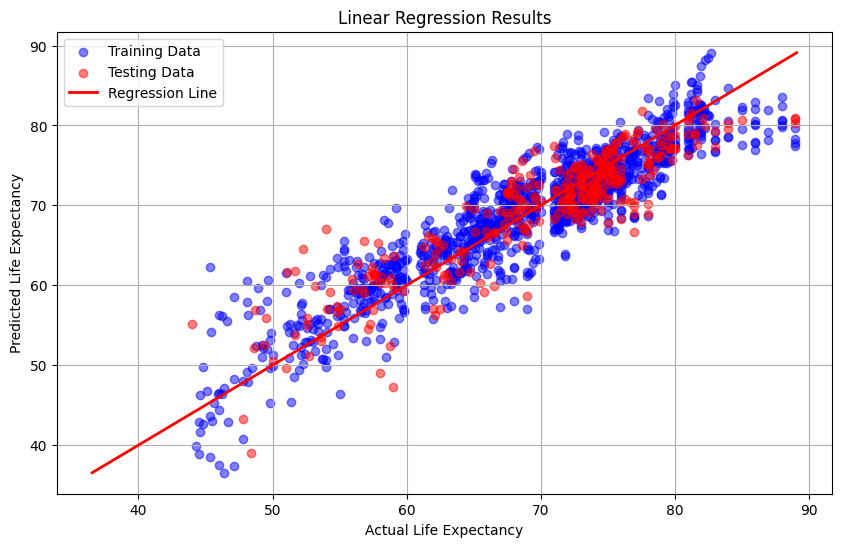

In [4]:
plt.figure(figsize=(10,6))

#Convert to Array so Matplotlib can be compatible with the Data
y_train = np.array(y_train)
y_test = np.array(y_test)
y_train_pred = np.array(y_train_pred)
y_test_pred = np.array(y_test_pred)

#Scatter plot for both training data and testing data
plt.scatter(y_train, y_train_pred, label='Training Data', color='blue', alpha=0.5)
plt.scatter(y_test, y_test_pred, label='Testing Data', color='red', alpha=0.5)

#Min and Max value for training and testing data
min_val = min(y_train.min(), y_test.min(), y_train_pred.min(), y_test_pred.min())
max_val = max(y_train.max(), y_test.max(), y_train_pred.max(), y_test_pred.max())

#Plotting the regression line
plt.plot([min_val, max_val], [min_val, max_val], color='red', linewidth=2, label='Regression Line')

plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.legend()
plt.title('Linear Regression Results')
plt.grid(True)
plt.show()

In [5]:
#Importing ExtraTreeRegesor so we can predict from class labels of data points instead of numerical

from sklearn.tree import DecisionTreeRegressor, plot_tree

treeExtra = DecisionTreeRegressor(
    max_depth=5,              # Set the maximum depth of the tree
    min_samples_split=5,      # Set the minimum samples required to split a node
    min_samples_leaf=2,       # Set the minimum samples required in a leaf node
    max_leaf_nodes=None,      # Limit the maximum number of leaf nodes (optional)
    min_impurity_decrease=0.0)

treeExtra.fit(X_train, y_train)

yTreeTest_pred = treeExtra.predict(X_test)

In [6]:
#MSE and R squared for test and train data for the DecisionTree
mse_treeTest = mean_squared_error(y_test, yTreeTest_pred)
r2_treeTest = r2_score(y_test, yTreeTest_pred)

print(f"Decision Tree testing data MSE: {mse_treeTest}")
print(f"Decision Tree testing R squared: {r2_treeTest}")

Decision Tree testing data MSE: 8.598027096245533
Decision Tree testing R squared: 0.8789393646384694


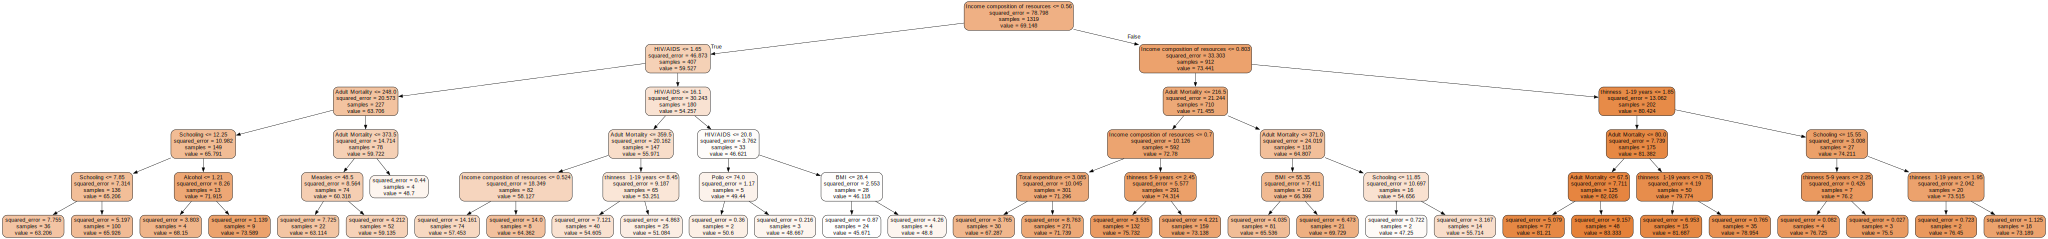

In [7]:
from graphviz import Source
from sklearn.tree import export_graphviz
import graphviz

dotData = export_graphviz(
        treeExtra,
        feature_names= X.columns,
        class_names= y,
        rounded=True,
        filled=True
    )

graphviz.Source(dotData)